In [62]:
import os
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

from config import DATA_PATH

(207403, 50)
Index(['Time', 'TarGear', 'CylPres', 'CylPresAct', 'LatAccel', 'LongAccel',
       'YawRate', 'SAS', 'EngStat', 'BrkDep', 'AccDep', 'EngRPM', 'WhlSpdFL',
       'WhlSpdFR', 'WhlSpdRL', 'WhlSpdRR', 'BatSOC', 'HeadLampHigh',
       'HeadLampLow', 'IndLeft', 'IndRight', 'DriveMode', 'OutTemp',
       'FuelEconomy', 'HevMode', 'BrkAct', 'EngColTemp', 'InhibitD',
       'InhibitN', 'InhibitP', 'InhibitR', 'VehSpdClu', 'ODO', 'Latitude',
       'Longitude', 'GPSMode', 'SatelliteNum', 'Altitude', 'Yaw', 'Pitch',
       'Roll', 'TrueNorth', 'NorthDeclination', 'LinkID', 'Congestion',
       'LinkDirection', 'LinkRoadType', 'LinkLength', 'LinkPassTime',
       'LinkSpeed'],
      dtype='object')
2


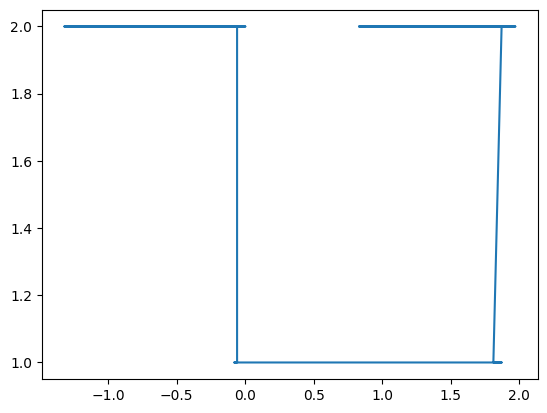

2


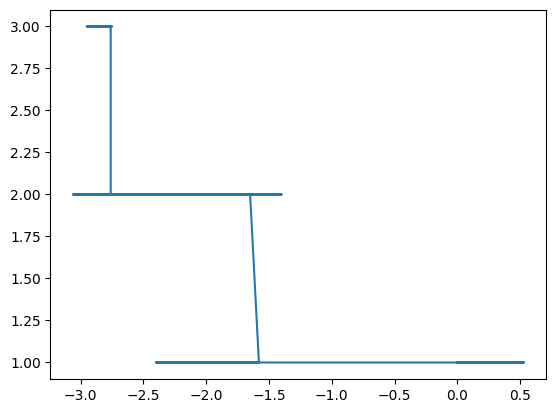

2


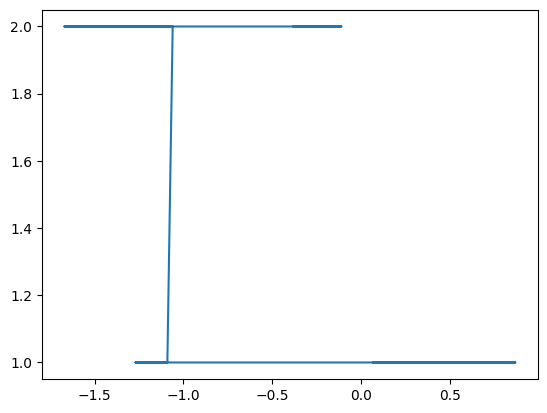

2


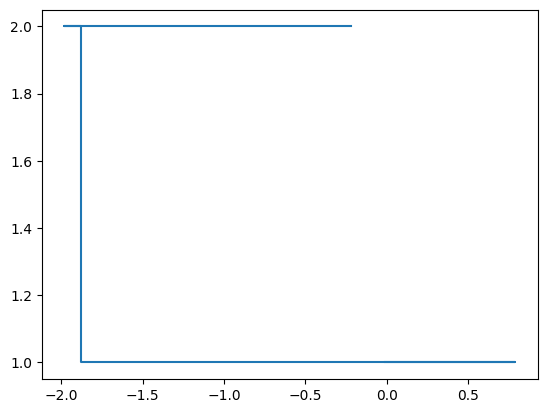

2


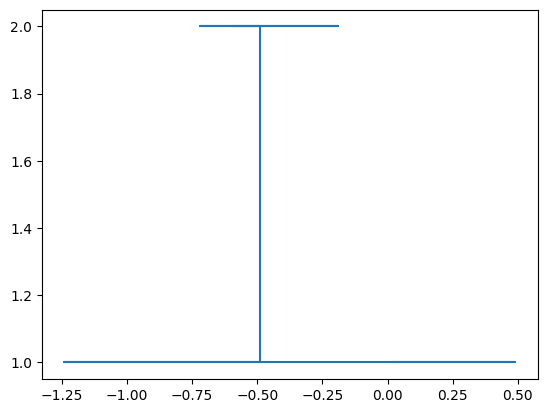

In [86]:
data_paths = glob(os.path.join(DATA_PATH, '*', 'total_log.csv'))
margin = 500

for path in data_paths:
    if '41354' in path:
        df = pd.read_csv(path)
        print(df.shape)
        print(df.columns)
        series = df[(df['TarGear'] - df['TarGear'].shift())==-1]['TarGear'].isin([1])
        true_index = series[series==True].index
        for index in true_index.values:
            if df.loc[index, 'DriveMode']!=2:
                continue
            print(df.loc[index, 'DriveMode'])
            plt.plot(df.loc[index-margin:index+margin, 'LongAccel'].values, df.loc[index-margin:index+margin, 'TarGear'].values)
            plt.show()
            # sys.exit()

(42923, 50)
Index(['Time', 'SAS', 'CylPres', 'CylPresAct', 'LatAccel', 'LongAccel',
       'YawRate', 'WhlSpdFL', 'WhlSpdFR', 'WhlSpdRL', 'WhlSpdRR', 'EngStat',
       'BrkDep', 'AccDep', 'EngRPM', 'TarGear', 'BatSOC', 'HeadLampHigh',
       'HeadLampLow', 'IndLeft', 'IndRight', 'DriveMode', 'OutTemp',
       'FuelEconomy', 'HevMode', 'BrkAct', 'EngColTemp', 'InhibitD',
       'InhibitN', 'InhibitP', 'InhibitR', 'VehSpdClu', 'ODO', 'Latitude',
       'Longitude', 'GPSMode', 'SatelliteNum', 'Altitude', 'Yaw', 'Pitch',
       'Roll', 'TrueNorth', 'NorthDeclination', 'LinkID', 'Congestion',
       'LinkDirection', 'LinkRoadType', 'LinkLength', 'LinkPassTime',
       'LinkSpeed'],
      dtype='object')
0


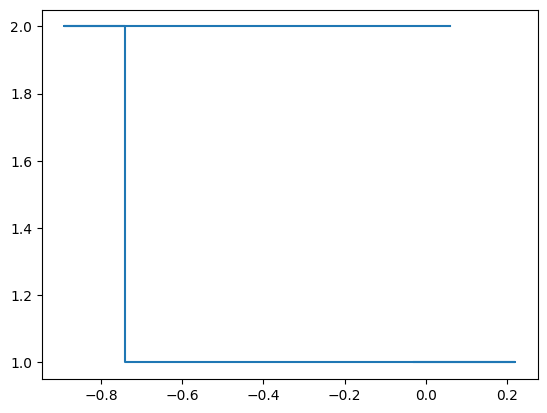

0


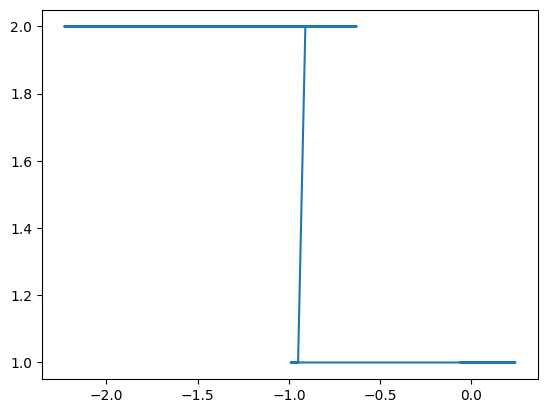

0


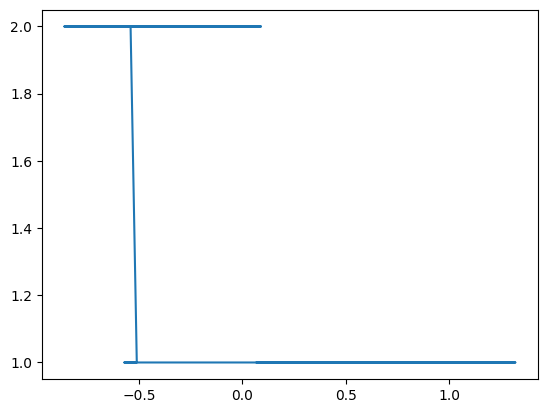

In [87]:
for path in data_paths:
    if '33641' in path:
        df = pd.read_csv(path)
        print(df.shape)
        print(df.columns)
        series = df[(df['TarGear'] - df['TarGear'].shift())==-1]['TarGear'].isin([1])
        true_index = series[series==True].index
        for index in true_index.values:
            if df.loc[index, 'DriveMode']!=0:
                continue
            print(df.loc[index, 'DriveMode'])
            plt.plot(df.loc[index-margin:index+margin, 'LongAccel'].values, df.loc[index-margin:index+margin, 'TarGear'].values)
            plt.show()
            # sys.exit()